<center><h2><strong><font color="blue">Outlier dan Missing Value </font></strong></h2></center>

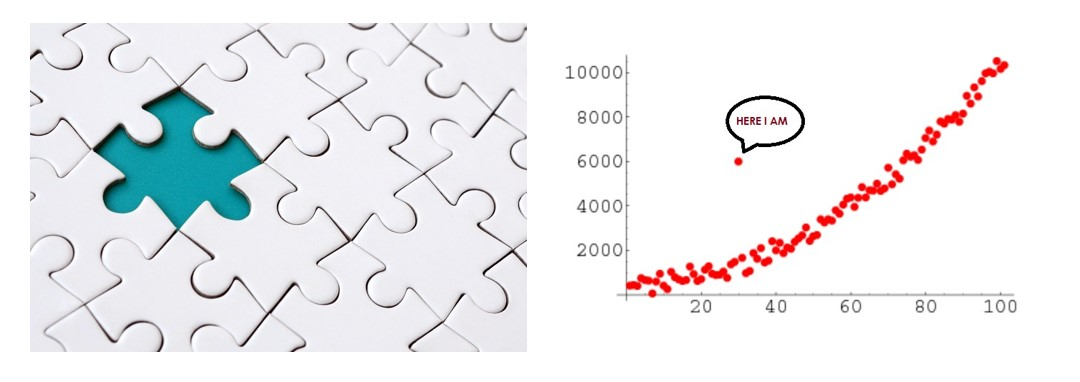

# Apa itu outlier dan missing value ? <br> mengapa keduanya harus diatasi?

In [1]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Download Data dari Kaggle
Cara download data dari Kaggle: https://www.kaggle.com/general/74235
link data kaggle: https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda

In [3]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"farohladayya","key":"91acec248fff9c8ecb4adfa062737055"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                       title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
haseebindata/student-performance-predictions              Student Performance Predictions                  9KB  2024-08-17 06:57:57           9994        217  0.9411765        
lainguyn123/student-performance-factors                   Student Performance Factors                     94KB  2024-09-02 10:53:57           3227         77  1.0              
hanaksoy/customer-purchasing-behaviors                    Customer Purchasing Behaviors                    1KB  2024-09-01 22:18:07           2100         29  1.0              
abdullah0a/human-age-prediction-synthetic-dataset         Human Age Prediction Synthetic Dataset         739KB  202

In [15]:
!kaggle datasets download -d satyajeetrai/palmer-penguins-dataset-for-eda

Dataset URL: https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda
License(s): MIT
  0% 0.00/3.76k [00:00<?, ?B/s]
100% 3.76k/3.76k [00:00<00:00, 7.52MB/s]


In [16]:
! unzip palmer-penguins-dataset-for-eda.zip

Archive:  palmer-penguins-dataset-for-eda.zip
  inflating: penguins.csv            


Read Data

In [17]:
df = pd.read_csv('penguins.csv')

In [18]:
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [19]:
# Tipe Datanya : DataFrame (df)
print(type(df))
# Ukuran Data
N, P = df.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 344, ', Kolom = ', 9)

In [20]:
# "Mengintip" beberapa data akhirnya
df.tail(10)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
334,334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male,2009
335,335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
336,336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
337,337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female,2009
338,338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [21]:
# chosen at random
df.sample(10)

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
287,287,Chinstrap,Dream,51.7,20.3,194.0,3775.0,male,2007
253,253,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,male,2009
36,36,Adelie,Dream,38.8,20.0,190.0,3950.0,male,2007
34,34,Adelie,Dream,36.4,17.0,195.0,3325.0,female,2007
288,288,Chinstrap,Dream,47.0,17.3,185.0,3700.0,female,2007
336,336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
220,220,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,female,2008
289,289,Chinstrap,Dream,52.0,18.1,201.0,4050.0,male,2007
176,176,Gentoo,Biscoe,42.9,13.1,215.0,5000.0,female,2007
226,226,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,female,2008


# Removing a variable(s)

In [22]:
df.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [24]:
# Drop kolom pertama karena tidak berguna (hanya index)
df.drop("id", axis=1, inplace=True)

# Mengoreksi Tipe variabel

In [26]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [27]:
# Merubah tipe data "jika" tidak tepat, contoh:
df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


In [29]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
df['year'] = df['year'].astype('float')

In [30]:
df.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,float64


In [31]:
#mengecek apakah ada duplikat data?
print(df.shape)
df.duplicated().sum()

(344, 8)


0

In [32]:
dup=df.iloc[3]

In [36]:
dup

,3
species,Adelie
island,Torgersen
bill_length_mm,NaN
bill_depth_mm,NaN
flipper_length_mm,NaN
body_mass_g,NaN
sex,NaN
year,2007.0


In [35]:
df = df._append(dup, ignore_index = True)

In [37]:
df.duplicated().sum()

1

In [38]:
#menghapus entri yang memiliki data duplikat
df.drop_duplicates(inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(344, 8)


# Deteksi Outlier menggunakan boxplot

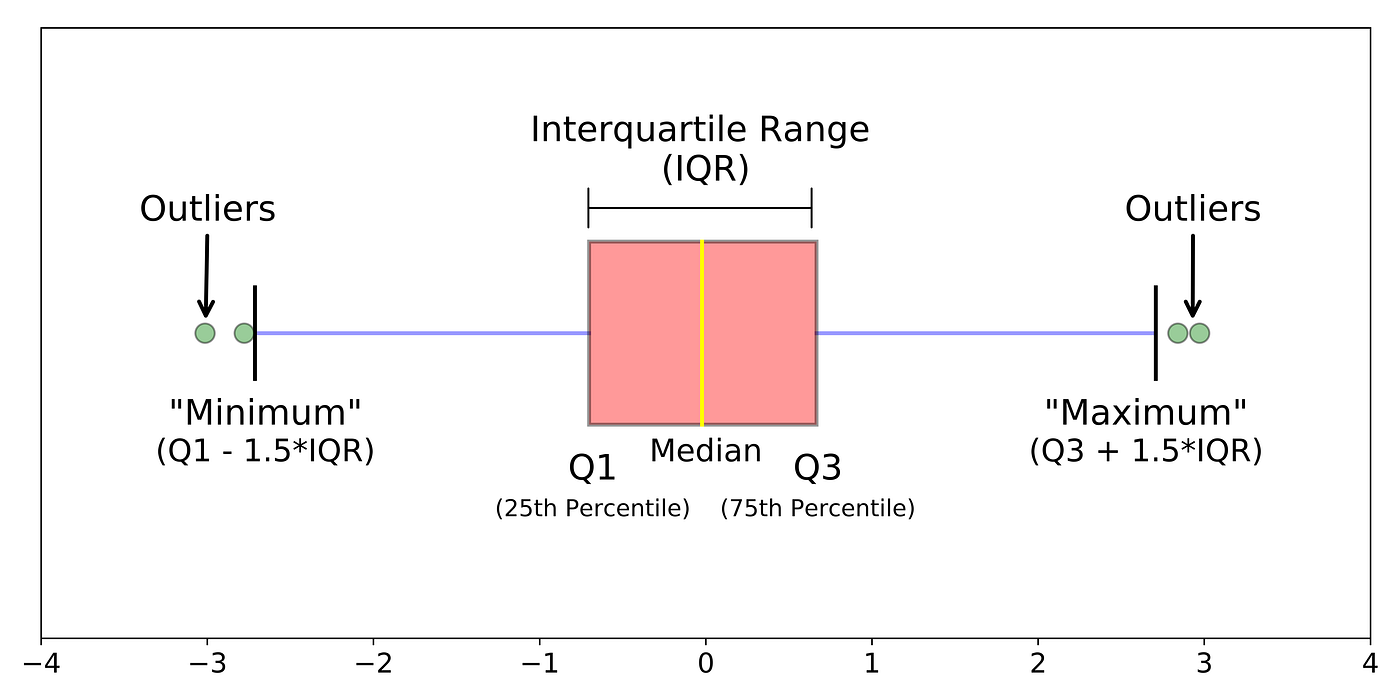

<Axes: ylabel='bill_depth_mm'>

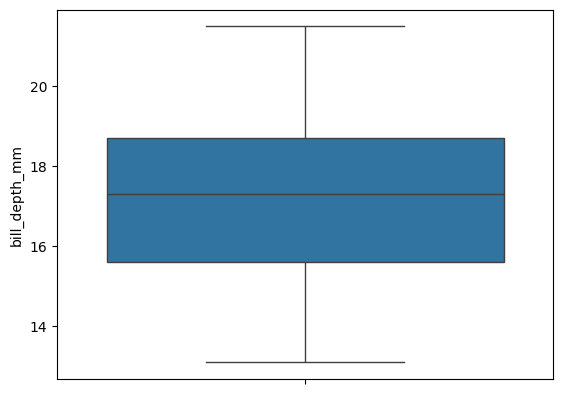

In [40]:
sns.boxplot(df['bill_depth_mm'])

In [42]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

cek = np.abs(df.bill_depth_mm - df.bill_depth_mm.mean())<=(2*df.bill_depth_mm.std())
# mu-2s<x<mu+2s
print(cek.shape)
cek.head(10)

(344,)


,bill_depth_mm
0,True
1,True
2,True
3,False
4,True
5,True
6,True
7,True
8,True
9,True


In [43]:
df2 = df[cek] # Data tanpa outliers
print(df2.shape, df.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya
# disimpan dalam variabel baru "Price2"
# Jika datanya besar hati-hati melakukan hal ini

(337, 8) (344, 8)


# Mengatasi Outlier
*   crosscheck apakah suatu kesalahan atau bukan
*   menghapus outlier
*   mempertahankan outlier
*   menggunakan metode yang robust terhadap outlier





# Missing Values

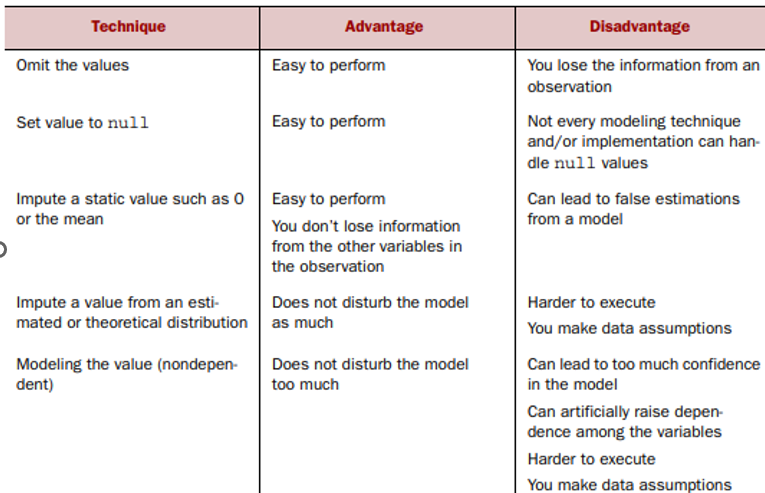

# Gambaran yang Lebih baik tentang MV terutama di Big Data

In [44]:
# General Look at the Missing Values
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [45]:
(df.isnull().sum()/len(df)).to_frame('persentase missing')

,persentase missing
species,0.000000
island,0.000000
bill_length_mm,0.005814
bill_depth_mm,0.005814
flipper_length_mm,0.005814
body_mass_g,0.005814
sex,0.031977
year,0.000000


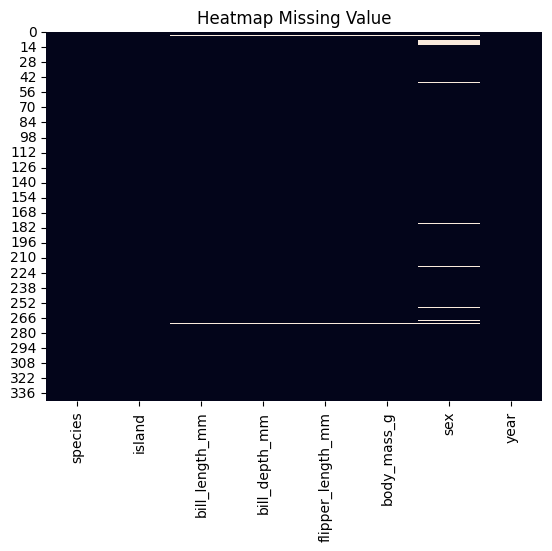

In [46]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = df.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
df.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
df.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
df.dropna(subset=['sex'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

## Exploratory Data Analysis (EDA)

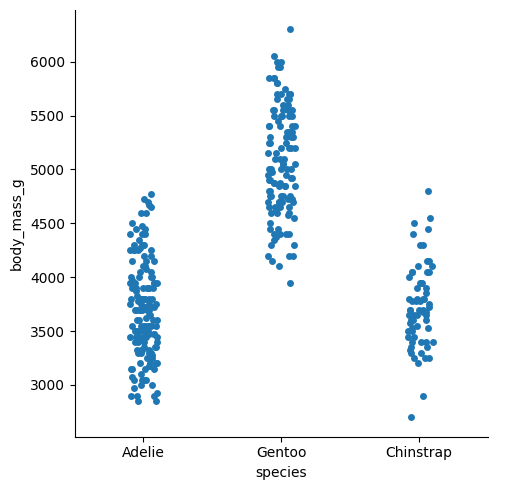

In [47]:
p= sns.catplot(x='species', y='body_mass_g', data=df)
# Apa yang bisa dilihat dari hasil ini?

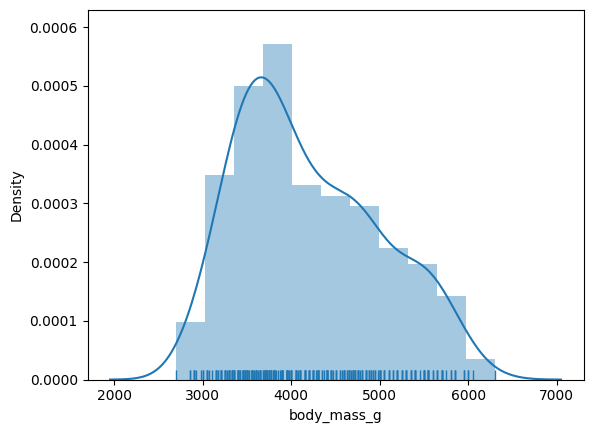

In [48]:
# Distributions
p = sns.distplot(df['body_mass_g'], kde=True, rug=True)

Lakukan analisis tambahan:


1.   Bagaimana cara membuat code pada variabel kategorik?
2.   Pada beberapa analisis perlu membuat variabel dummy, bagaimana cara membuat variabel dummy?
3.   Kapan data perlu di transformasi? bagaimana cara melakukan transformasi data?
4.   Lakukan EDA lanjutan pada data tersebut



